# Intermediate Machine Learning: Assignment 5

**Deadline**

Assignment 5 is due Wednesday, December 7 by 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a pdf file on Gradescope, and as a notebook (.ipynb) on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Policy iteration
 * RNNs and GRUs
 * LSTMs

This assignment will also help to solidify your Python skills.

## Problem 1: Policy Iteration (10 Points)

During class, we talked about the policy iteration algorithm, which is a tabular method that estimates the optimal policy using iterative policy evaluation. 
More specifically, at each policy evaluation step, we follow a policy $\pi$ and update the value function $V(s)$ for each state $s$ as 

$$
V(s) \gets \sum_{s', r} p(s', r|s, \pi(s))[r + \gamma V(s')];
$$

at each policy improvement step, we improve the current policy $\pi(s)$ following the updated value function: 

$$
\pi(s) \gets \text{argmax}_{a}\sum_{s',r} p(s', r|s,a)[r+\gamma V(s')].
$$

Following this iteration of policy evaluation and policy improvement, we can obtain a sequence of monotonically improving policies and value functions. In other words, each policy is guaranteed to be a strict improvement over the previous one unless it is an optimal policy, i.e., $\pi = \pi^*$.

Since a finite MDP (Markov Decision Process) has only a finite number of policies, this process eventually converges to an optimal policy $\pi^*$ and the corresponding optimal value function in a finite number of iterations.

However, it is not entirely clear *a priori* why we are able to constantly improve our policy $\pi$ following this alternating process. 

In this question, we walk you through a proof that the policy improves in each iteration of the algorithm. 

1. Suppose we have a policy $\pi$ and a monotonically improved policy $\pi'$, such that for all states $s \in S$, we have 

$$
Q_{\pi}(s, \pi'(s)) \ge V_{\pi}(s).
$$

Show that the value function $V_{\pi'}$ dominates $V_{\pi}$, i.e., for all states $s \in S$

$$
V_{\pi'}(s) \ge V_{\pi}(s).
$$

*Hint: Consider expanding the value functions iteratively.*

In [ ]:
# your markdown here

2. Apply the conclusion of part 1 to the policy improvement step to show that it leads to a sequence of monotonically improving policies. In other words, show that if $\pi \neq \pi^*$, the next round policy $\pi'$ under the policy iteration algorithm satisfies $V_{\pi'}(s) > V_{\pi}(s)$ for some state $s\in S$.

In [ ]:
# your markdown here

## Problem 2: Elephants Can Remember (20 points)

Text generation is a common task in Natural Language Processing (NLP), where, given an initial text as a prompt, the model will produce human-like text that continues the prompt. Over the past years, transformer-based models (like GPT-3) have taken over the domain of text generation. In this problem, let's take a step back and focus on the earlier sequence models for text generation: Vanilla Recurrent Neural Networks (RNNs) and Recurrent Neural Networks with Gated Recurrent Units (GRUs). The models in this part of the assignment will be character-based models, trained on an extract of the book "Elephants Can Remember" by Agatha Christie. To reduce the size of our vocabulary, the text is pre-processed by converting the letters to lower case and removing numbers. The code below shows some information about our training and test set. All the necessary files for this problem are available through Canvas, under the file name "q2_data", a compressed folder.


In [ ]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import random
  
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation
from keras.layers import GRU, SimpleRNN

In [ ]:
with open('q2_data/Agatha_Christie_train.txt', 'r') as file:
    train_text = file.read()
    
with open('q2_data/Agatha_Christie_test.txt', 'r') as file:
    test_text = file.read()

vocabulary = sorted(list(set(train_text + test_text)))
vocab_size = len(vocabulary)

# Dictionaries to go from a character to index and vice versa
char_to_indices = dict((c, i) for i, c in enumerate(vocabulary))
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary))

In [ ]:
# The first 500 characters of our training set
train_text[0:500]

In [ ]:
print("The vocabulary contains", vocab_size, "characters")
print("The training set contains", len(train_text) ,"characters")
print("The test set contains", len(test_text) ,"characters")

### Problem 2.1: The Diversity of Language Models

Before jumping into coding, let's start with comparing the language models we will be using in this assigment.

1. Describe the differences between a Vanilla RNN and a GRU network. In your explanation, make sure you mention the issues with vanilla RNNs and how GRUs try to solve them. 

In [ ]:
# Your markdown here

2. Describe at least two advantages of a character based language model over a word based language model.

In [ ]:
# Your markdown here

### Problem 2.2: Generating Text with the Vanilla RNN

The code below loads in a pretrained vanilla RNN model with two layers. The model is set up exactly like in the lecture slides (with tanh activation layers in the recurrent layers) with the addition of biases (intercepts) in every layer (i.e. the recurrent layer and the dense layer). The training process consisted of 30 epochs.

In [ ]:
# load json and create model
json_file = open('q2_data/RNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

RNN_model = model_from_json(loaded_model_json)
RNN_model.load_weights("q2_data/RNN_model.h5")

In [ ]:
# load in the weights and show summary
weights_RNN = RNN_model.get_weights()
RNN_model.summary()

Finish the following function that uses a vanilla RNN architecture to generate text, given the weights of the RNN model, a text prompt, and the number of characters to return. The function should be completed by **only using numpy functions**. Use your knowledge of how every weight plays its role in the RNN architecture. Do not worry about the weight extraction part, this is already provided for you. The weight matrix $W_{xh1}$, for example, denotes the weight matrix to go from the input x to the first hidden state layer h1. The hidden states $h_1$ and $h_2$ are initialized to a vector of zeros. 

The embedding of each character has to be done by a one-hot encoding, where you will need the dictionaries defined in the introduction to go from a character to an index position.

In [ ]:
def sample_text_RNN(weights, prompt, N):
    '''
    Uses a pretrained RNN to generate text, starting from a prompt, 
    only using the weights and numpy commands
            Parameters:
                    weights (list): Weights of the pretrained RNN model
                    prompt (string): Start of generated sentence
                    N (int): Length of output sentence (including prompt)
            Returns:
                    output_sentence (string): Text generated by RNN
    '''
    # Extracting weights and biases
    # Dimensions of matrices are same format as lecture slides

    # First Recurrent Layer 
    W_xh1 = weights[0].T 
    W_h1h1 = weights[1].T 
    b_h1 = np.expand_dims(weights[2], axis=1)

    # Second Recurrent Layer
    W_h1h2 = weights[3].T
    W_h2h2 = weights[4].T
    b_h2 = np.expand_dims(weights[5], axis=1)

    # Linear (dense) layer
    W_h2y = weights[6].T
    b_y = np.expand_dims(weights[7], axis=1)
    
    # Initiate the hidden states
    h1 = np.zeros((W_h1h1.shape[0], 1))
    h2 = np.zeros((W_h2h2.shape[0], 1))
    
    # -----------------------------------------------
    
    # Your code starts here
    output_sentence = ""
        
    return output_sentence

Test out your function by running the following code cell. Use it as a sanity check that your code is working. The generated text should not be perfect English, but at least you should be able to recognize some words.

In [ ]:
print(sample_text_RNN(weights_RNN, 
                      'mrs. oliver looked at herself in the glass. she gave a brief, sideways look', 
                      1000))

### Problem 2.3: Generating Text with the GRU

The code below loads in a pretrained GRU model. The model is set up exactly like in the lecture slides (with sigmoid activation layers for the gates and tanh activation layers in the recurrent layer) and trained for 30 epochs.

In [ ]:
# load json and create model
json_file = open('q2_data/GRU_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

GRU_model = model_from_json(loaded_model_json)
GRU_model.load_weights("q2_data/GRU_model.h5")

In [ ]:
# load in the weights and show summary
weights_GRU = GRU_model.get_weights()
GRU_model.summary()

Finish the following function that uses a GRU architecture to generate text, given the weights of the GRU model, a text prompt, and the number of characters to return. The function should be completed by **only using numpy functions**. Use your knowledge of how every weight plays its role in the GRU architecture. Do not worry about the weight extraction part, this is already provided for you. The hidden state $h$ is initialized to a vector of zeros. 

The embedding of each character has to be done by a one-hot encoding, where you will need the dictionaries defined in the introduction to go from a character to an index position.

In [ ]:
# Helper function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sample_text_GRU(weights, prompt, N):
    '''
    Uses a pretrained GRU to generate text, starting from a prompt,
    only using the weights and numpy commands
            Parameters:
                    weights (list): Weights of the pretrained GRU model
                    prompt (string): Start of generated sentence
                    N (int): Total length of output sentence
            Returns:
                    output_sentence (string): Text generated by GRU
    '''
    # Extracting weights and biases
    # Dimensions of matrices are same format as lecture slides
    
    # GRU Layer 
    W_ux, W_rx, W_hx = np.split(weights[0].T, 3, axis = 0)
    W_uh, W_rh, W_hh = np.split(weights[1].T, 3, axis = 0)

    bias = np.sum(weights[2], axis=0)
    b_u, b_r, b_h = np.split(np.expand_dims(bias, axis=1), 3)

    # Linear (dense) layer
    W_y = weights[3].T
    b_y = np.expand_dims(weights[4], axis=1)
    
    # Initiate hidden state
    h = np.zeros((W_hh.shape[0], 1))
    
    # -----------------------------------------------
    
    # Your code starts here
    output_sentence = ""
        
    return output_sentence

Test out your function by running the following code cell. Use it as a sanity check that your code is working. The generated text should not be perfect English, but at least you should be able to recognize some words.

In [ ]:
print(sample_text_GRU(weights_GRU, 
                      'mrs. oliver looked at herself in the glass. she gave a brief, sideways look',
                      1000))

### Problem 2.4: Can Elephants Remember Better?

Perplexity is a measure to quantify how "good" a language model $M$ is, based on a test (or validation) set. The perplexity on a sequence $s$ of characters $a_i$ of size $N$ is defined as:

$$
\text{Perplexity}(M) = M(s)^{(-1/N)} = \left\{p(a_1, ..., a_N)\right\}^{(-1/N)} = \left\{p(a_1) \ p(a_2|a_1) \ ... \  p(a_N|a_1,\ldots, a_{N-1})\right\}^{(-1/N)}
$$

The intuition behind this metric is that, if a model assigns a high probability to a test set, it is not surprised to see it (not perplexed by it), which means the model $M$ has a good understanding of how the language works. Hence, a good model has, in theory, a lower perplexity. The exponent $(-1/N)$ in the formula is just a normalizing strategy (geometric average), because adding more characters to a test set would otherwise introduce more uncertainty (i.e. larger test sets would have lower probability). So by introducing the geometric average, we have a metric that is independent of the size of the test set.

When calculating the perplexity, it is important to know that taking the product of a bunch of probabilities will most likely lead to a zero value by the computer. To prevent this, make use of a log-transformation:

$$
\text{Log-Perplexity}(M) = -\frac{1}{N} log\left\{p(a_1, ..., a_N)\right\} = -\frac{1}{N} \left\{log \ p(a_1) + \ log \ p(a_2|a_1) + \ ... \ + log \  p(a_N|a_1,\ldots,a_{N-1})\right\} 
$$

Don't forget to go back to the normal perplexity after this transformation. 

1. Before calculating the perplexity of a test sequence, start with comparing the outputs of 2.2 and 2.3. Do you see any differences in the generated text of the Vanilla RNN model and the GRU model? Briefly discuss.

In [ ]:
# Your markdown here

2. Calculate the perplexity of each language model by using test_text, an unseen extract of the book. Choose the prompt as the first $m$ letters of the test set, where $m$ is a parameter that you can choose yourself. You should be able to reuse the majority of your previous code in this calculation. Discuss your results at the end.

In [ ]:
# Your code here

3. As seen in part 2 and 3 of this problem, the text generation is not perfect. Describe some possible model improvements that could make the quality of the generated text better.

In [ ]:
# Your markdown here

## Problem 3: Are you Opinionated? ( 20 points)

In this problem, we will see how an LSTM recognises the patterns and nuances of a language and is able to help with a difficult classification task. We will work with the [SwitchBoard](https://huggingface.co/datasets/swda) Dataset which is a collection of transcribed phone conversations between people. The corpus has many different kinds of sentiment labels, which you can read about [here](https://huggingface.co/datasets/swda) under the section Dialog act annotations. 

For our problem, we will only consider the labels **Statement-non-opinion** and **Statement-opinion** for our classification model. A statement opinion is a sentence/dialogue act where the speaker is trying to assert an opinion in the dialogue such as "I think it's great", "I guess that is correct". Statement Non opinions are sentences where there is no opinion being expressed by the speaker, such as "Our winter break is starting on 22nd December, 2022 this year" or "The Great Rocky Mountains have been voted to be one of the most beautiful mountain ranges this year". 

We will use Tensorflow here to build our classification model.



In [1]:
import matplotlib.pyplot as plt
import string
import tensorflow as tf
import pandas as pd
import re
import os

from tensorflow.keras import layers
from tensorflow.keras import losses
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Load in the data and pre-process the text to extract our desired labels to work with. A file named Training_Data.csv has been uploaded to Canvas which contains the data to be trained on.

In [3]:
# You do not have to change anything here. Just run it! Just make sure 
# Training_Data.csv is in the same directory of the code.

train_data = pd.read_csv('Training_Data.csv')
X_train = train_data['Sentence']
y_train = train_data['Label']

In [4]:
## Dont change anything. Just Run it!

BUFFER_SIZE = 500
BATCH_SIZE = 256

# Convert the data to tensors to feed into our model. Just run it!
train_tensor=tf.convert_to_tensor(X_train)
raw_train_ds=tf.data.Dataset.from_tensor_slices((train_tensor, y_train))
raw_train_ds = raw_train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

You can visualize your training dataset and labels here.

In [2]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Text", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

In the next few code blocks, we define a standard custom vectorization function for our vectorization of input sentences. We will use Tensorflow's [TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) library here to 
vectoeize our texts as input to our model. 

In [6]:
# Feel free to change a few settings if you think it could improve your model. 

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation.replace('?','')),
                                  '')

max_features = 10000
sequence_length = 300

# Defining the text vectorization layer.
vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = max_features,
    output_mode = 'int',
    output_sequence_length = sequence_length)

# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

We finally vectorize our texts and check how our vectorization works with our input sentences.

In [1]:
## Dont change anything. Just run it!

# Define our vectorization function
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# Retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Text", first_review)
print("Label", first_label.numpy())
print("Vectorized review", vectorize_text(first_review, first_label))

# Call the defined functions to vectorize our texts.
train_ds = raw_train_ds.map(vectorize_text)

In [8]:
# Using tf autotune to prefetch the data for training. Just run it!
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Problem 3.1: Build your model!

Complete the below model to build your very own Neural Network. Be sure to use LSTM in one or more of your layers. 

You can read about Tensorflow [LSTM Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) and combine it with [Bidirectional Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional) to power it even more. 

Comment on your decision of your final model design. How many layers did you use? What motivations did you have to build your model the way you did? 



In [ ]:
# Build your model to train on the dataset. Complete the layers of the model 
# according to what you think may be the right mix to get a better accuracy.

# Here out_dimension is the dimension of the output of the first layer.
out_dim = 64

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features, out_dim),
  ## ---------------- Your Code here ---------------- ##
])


# Call model.summary() to view your model once done!
model.summary()

### Problem 3.2 Compile your model

Compile your model and set the loss function to be BinaryCrossentropy as we are doing a Binary Classification. Set your model metric to caputure the accuracy of your model while training. This will enable you to measure the accuracy at each epoch and also gauge the test data prediction accuracy. 

**Hint:** Read all about [tf.model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) for model compilation with suitable arguments and functions. 

In [ ]:
# Compile your model and set the loss function 
model.compile(loss = losses.BinaryCrossentropy(from_logits=False),
              optimizer = 'adam',
              metrics = ## ---------------- Your Code here ---------------- ## 
              )

Only run below cell if you have already trained your model and want to reload the model from the trained weights instead of training it again.

In [ ]:
# checkpoint_path = "trained_network/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)             
# model.load_weights(checkpoint_path)

### Problem 3.3 Train the network!

Complete below code to train your Neural Network and save your weights to your desired location. Choose your model parameters according to what you think is the best fit for your model to achieve the classification task. You will be judged based on the accuracy of your trained model on your test dataset.

In [ ]:
# Set the checkpoint path of your model where each checkpoint of your trained 
# network will save the weights to. 
checkpoint_path = "trained_network/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Set the number of epochs to train your model with and train your neural 
# network.
epochs = 
history = model.fit(train_ds, epochs=epochs, callbacks=[cp_callback])

### Problem 3.4 Test your Model Accuracy

Given with this assigment, is a file (uploaded to canvas under files named Ass5_Texts.csv), which gives 10 sentences each student. 

**a.** Read in the dataset and use your trained model to predict the probabilities of the output label being an opinion or not. Make a column named Predicted_Label with the output being 1 if the probability>0.5, 0 otherwise.

**b.** Make a hand-labelled output column in your dataframe portraying what labels you think the sentences should be assigned to.

**c.** Comment on your findings below about the model accuracy. Did you change anything in the code blocks above which effected your model quality? What can you say about the effect of using LSTM in your model to achieve this task?

Write your created dataframe to a csv file and submit it to gradescope along with your ipynb file. A snapshot of the desired dataframe is given below.



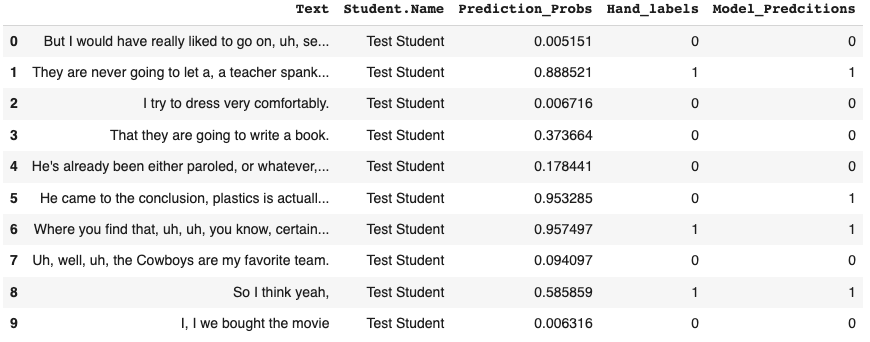

In [ ]:
## -------------------------------- Your Code here -------------------------------- ##